# Model Selection In-Class Exercise

In this example, you will a linear model to data and select the model order by model order selection.  First load the standard packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [ ]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit04_model_sel/synth_data.p'
fn_dst = 'synth_data.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    x,y = pickle.load(fp)

File synth_data.p downloaded


Plot the data `y` vs. `x` using a scatter plot. 

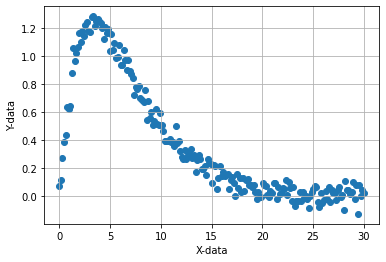

In [ ]:
# TODO
plt.scatter(x,y)
plt.xlabel('X-data')
plt.ylabel('Y-data')
plt.grid()

## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [ ]:
# TODO
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.33, random_state=42)
print(xtr.shape,ytr.shape,xts.shape,yts.shape)

(134,) (134,) (66,) (66,)


Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

Estimated model order= 7


/usr/local/lib/python3.6/dist-packages/numpy/polynomial/polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


0.004030677330130336

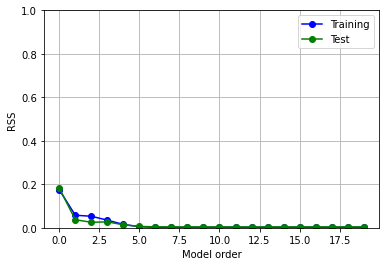

In [ ]:
# TODO
import numpy.polynomial.polynomial as poly
det=np.array(range(0,20))
RSStest = []
RSStr = []
for d in det:
    beta_hat = poly.polyfit(xtr,ytr,d)
    yhat=poly.polyval(xtr,beta_hat)
    RSSd = np.mean((yhat-ytr)**2)
    RSStr.append(RSSd)
    # Measure RSS on test data
    yhat = poly.polyval(xts,beta_hat)
    RSSd = np.mean((yhat-yts)**2)
    RSStest.append(RSSd)
plt.plot(det,RSStr,'bo-')
plt.plot(det,RSStest,'go-')
plt.xlabel('Model order')
plt.ylabel('RSS')
plt.grid()
plt.ylim(0,1)
plt.legend(['Training','Test'],loc='upper right')
imin = np.argmin(RSStest)
dopt=det[imin]
print("Estimated model order= {0:d}".format(dopt))
RSStest[imin]

Select the optimal model order `dopt`.  Re-train the model for that model order.  On one plot:
* Plot the predicted value `yhat` vs. `x` for your model for `x in [0,35]`
* Plot a scatter plot of the test data `xts` vs. `yts`

Does your model fit the test data well?
Does it extrapolate reasonably in the range `x >= 30`?

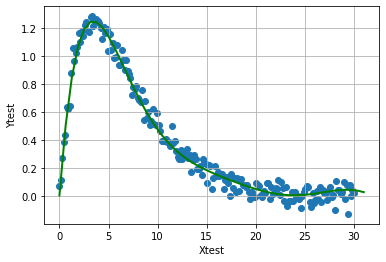

In [ ]:
# TODO
plt.scatter(x,y)
plt.xlabel('Xtest')
plt.ylabel('Ytest')
plt.grid()

beta_hat = poly.polyfit(xtr,ytr,dopt)
xp = np.linspace(0,31)
yp_hat = poly.polyval(xp,beta_hat)
plt.plot(xp,yp_hat,'g',linewidth=2)